# Text Analysis with (MBTI) Myers-Briggs Personality Type Dataset

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# read data
data = pd.read_csv('data/mbti_1.csv') # dtype = {'type': str,'post': ,

## Overview of the data

In [2]:
data.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
### One post

In [4]:
data.head(1).posts.values

array([ "'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design

# Distribution of the target variable?

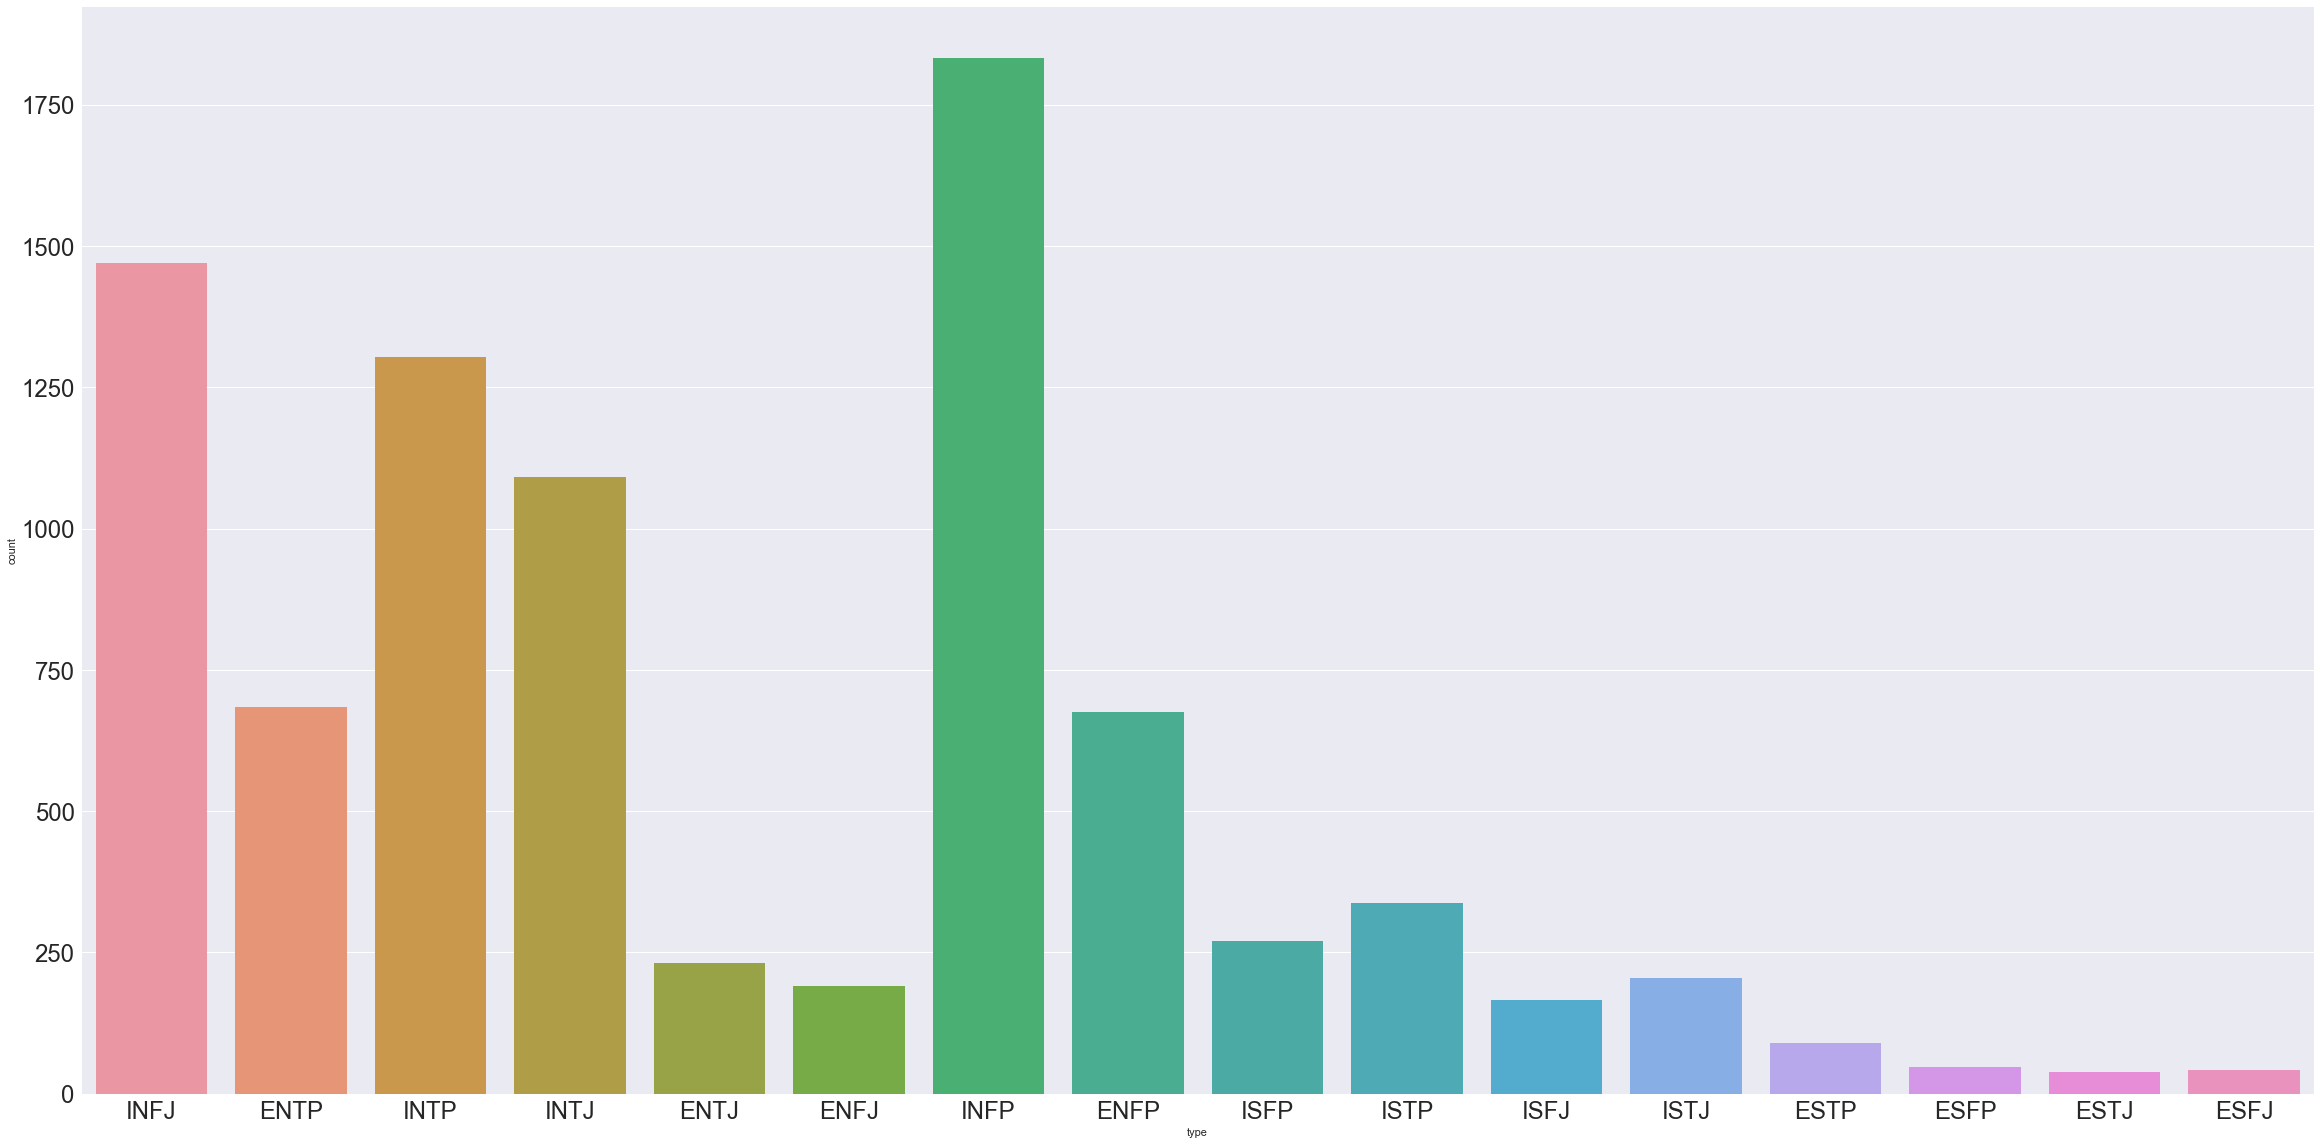

In [5]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=data, x='type')

### It is clearly unbalanced throughout the different classes. 

# Preprocessing

In [6]:
##### Encode each type to an int

from sklearn.preprocessing import LabelEncoder

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)


In [7]:
##### Compute list of subject with Type | list of comments | list of url | count youtube videos

list_subject = []

for row in data.iterrows():
    list_comment = []
    list_url = []
    list_youtube = []
    posts = row[1].posts
    for post in posts.split("|||"):
        urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', post)
        if urls:
            post = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', post)
            list_url += urls
        if any(post):
            list_comment.append(post)
    list_youtube += [sum([1 for s in list_url if "youtube" in s])]
    
    type_labelized = lab_encoder.transform([row[1].type])[0]
    list_subject.append([type_labelized, list_comment, list_url, list_youtube])

del data
subject_type = np.array([subject[0] for subject in list_subject])
#subject_comments = ["".join(subject[1]) for subject in list_subject]

#### Exemple of one row

In [8]:
list_subject[0]

[8,
 ["'",
  'enfp and intj moments    sportscenter not top ten plays    pranks',
  'What has been the most life-changing experience in your life?',
  '     On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   ',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390     ...',
  'Welcome and stuff.',
  '  Game. Set. Match.',
  "Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...",
  "Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive fun

In [9]:
##### Remove and clean comments

from nltk import word_tokenize
#X = [word_tokenize("".join(subject[1])) for subject in list_subject]

# Remove numbers
subject_comments_1 = [re.sub("[^a-zA-Z]", " ", " ".join(sentence[1]).lower()).split(' ') for sentence in list_subject]

# Remove spaces
subject_comments_1 = [re.sub(' +', ' ', " ".join(comments)) for comments in subject_comments_1]

In [10]:
# Remove stopwords

from nltk.corpus import stopwords 

# subject_comments_1 = [" ".join([w for w in comment.split(' ') if w not in stopwords.words("english")]) for comment in subject_comments_1]

#### Row text after treatment

In [11]:
subject_comments_1[3]

' dear intp i enjoyed our conversation the other day esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created dear entj sub long time no see sincerely alpha none of them all other types hurt in deep existential ways that i want no part of probably a sliding scale that depends on individual preferences like everything in humanity draco malfoy also i d say he s either or i m either or though in which stacking to me is a somewhat arbitrary distinction to make as i believe that the core indicates primary motivation and has a hand in every action therefore a i m not particularly introverted or extraverted personally that said i would say i m somewhat unphased by either social interactions or being alone what i d say i crave more so than anything is dear type infp your absolute admiration of me is refreshing you re a great girlfriend and i wish we both didn t have such busy schedules so we could be around one another mo

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

vectorizer = TfidfVectorizer(max_df=0.5, analyzer='word', max_features=100,
                             min_df=3,
                             use_idf=True)
X_tfidf =  vectorizer.fit_transform(subject_comments_1).todense()
pickle.dump(vectorizer, open("data/tfidf.pickle.dat", "wb"))

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 1500) 

X_vectorized = vectorizer.fit_transform(subject_comments_1).toarray()

pickle.dump(vectorizer, open("data/CountVect.pickle.dat", "wb"))

count_youtube = [c[3] for c in list_subject]
X_concat = np.column_stack((X_tfidf, X_vectorized, count_youtube))

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


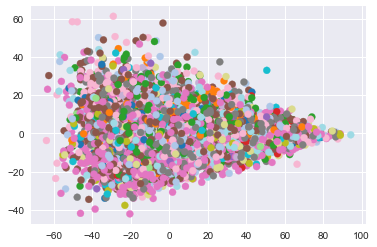

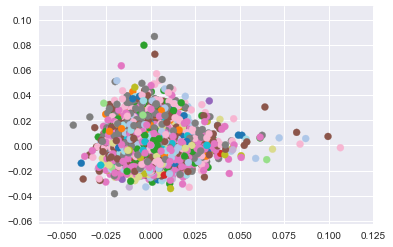

In [19]:
from sklearn.decomposition import KernelPCA, FastICA, PCA
from sklearn.preprocessing import StandardScaler

X_concat_scaled = StandardScaler().fit_transform(X_concat)

pca = PCA(n_components=12)
pca.fit(X_concat)
pca_vec = pca.transform(X_concat)
plt.figure(1)
plt.scatter(pca_vec[:,0], pca_vec[:,1], c=subject_type, cmap=plt.get_cmap('tab20') )

ica= FastICA(n_components=12)
ica.fit(X_concat)
ica_vec = ica.transform(X_concat)
plt.figure(2)
plt.scatter(ica_vec[:,0], ica_vec[:,1], c=subject_type, cmap=plt.get_cmap('tab20') )

# Does not improve xgboost predictions

In [20]:
# Confusion plot
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
##### Multinomial Naive Bayes

from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

def train_stratified(model, X, y, nsplits=3):
    '''
    Take a sklearn model like, feature set X, target set y and number of splits to compute Stratified kfold validation.
    '''
    for train, test in StratifiedKFold(subject_type, shuffle=True):
        model.fit(X[train], y[train])
        preds = model.predict(X[test])
        print(classification_report(y[test], preds))
            
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y[test], preds)
        np.set_printoptions(precision=2)

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,
                              title='Normalized confusion matrix')

             precision    recall  f1-score   support

          0       0.29      0.41      0.34        64
          1       0.48      0.54      0.51       225
          2       0.24      0.44      0.31        77
          3       0.60      0.54      0.57       229
          4       0.07      0.14      0.10        14
          5       0.20      0.06      0.10        16
          6       0.40      0.15      0.22        13
          7       0.22      0.27      0.24        30
          8       0.69      0.45      0.54       490
          9       0.58      0.65      0.62       611
         10       0.61      0.52      0.56       364
         11       0.64      0.64      0.64       435
         12       0.34      0.36      0.35        56
         13       0.34      0.42      0.37        91
         14       0.57      0.38      0.45        69
         15       0.41      0.58      0.48       113

avg / total       0.56      0.54      0.54      2897

Normalized confusion matrix
             pr

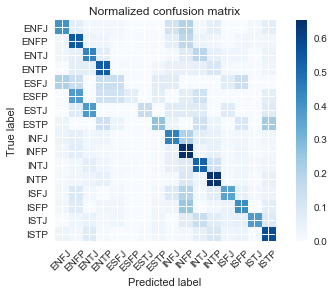

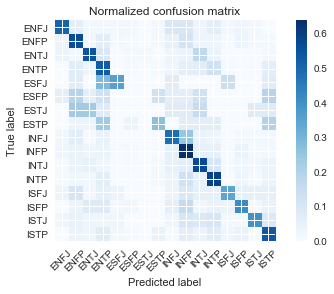

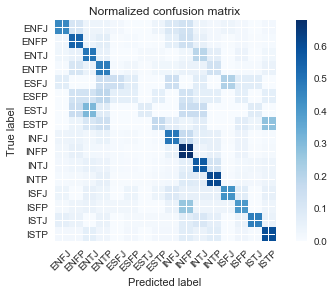

In [22]:
train_stratified(MultinomialNB(), X_concat, subject_type, 5)

[0]	train-merror:0.390539	test-merror:0.403217
[1]	train-merror:0.359389	test-merror:0.380816
[2]	train-merror:0.339487	test-merror:0.369902
[3]	train-merror:0.33516	test-merror:0.361287
[4]	train-merror:0.326795	test-merror:0.35382
[5]	train-merror:0.319585	test-merror:0.359563
[6]	train-merror:0.312085	test-merror:0.348076
[7]	train-merror:0.305019	test-merror:0.34463
[8]	train-merror:0.297808	test-merror:0.343481
[9]	train-merror:0.290309	test-merror:0.346927
[10]	train-merror:0.285694	test-merror:0.341758
[11]	train-merror:0.280935	test-merror:0.34463
[12]	train-merror:0.27156	test-merror:0.346353
[13]	train-merror:0.264061	test-merror:0.341758
[14]	train-merror:0.262475	test-merror:0.344055
             precision    recall  f1-score   support

          0       0.50      0.34      0.41        38
          1       0.64      0.56      0.60       135
          2       0.53      0.38      0.44        47
          3       0.60      0.60      0.60       137
          4       1.00      0

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1134: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0]	train-merror:0.393603	test-merror:0.411188
[1]	train-merror:0.357873	test-merror:0.378316
[2]	train-merror:0.344907	test-merror:0.361592
[3]	train-merror:0.336983	test-merror:0.357555
[4]	train-merror:0.326322	test-merror:0.357555
[5]	train-merror:0.322144	test-merror:0.354671
[6]	train-merror:0.313932	test-merror:0.349481
[7]	train-merror:0.309465	test-merror:0.350058
[8]	train-merror:0.302694	test-merror:0.344867
[9]	train-merror:0.295491	test-merror:0.341984
[10]	train-merror:0.289872	test-merror:0.33737
[11]	train-merror:0.285694	test-merror:0.338524
[12]	train-merror:0.280507	test-merror:0.33391
[13]	train-merror:0.272583	test-merror:0.332757
[14]	train-merror:0.270278	test-merror:0.331027
             precision    recall  f1-score   support

          0       0.60      0.47      0.53        38
          1       0.65      0.65      0.65       135
          2       0.79      0.48      0.59        46
          3       0.61      0.58      0.59       137
          4       0.43    

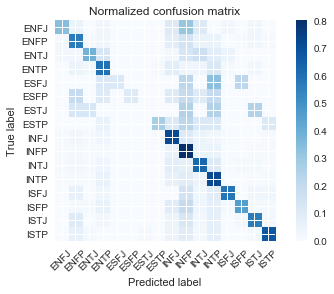

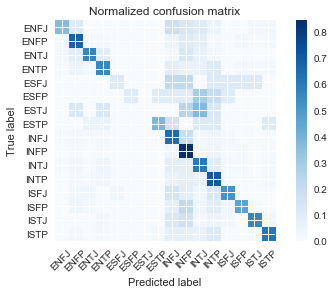

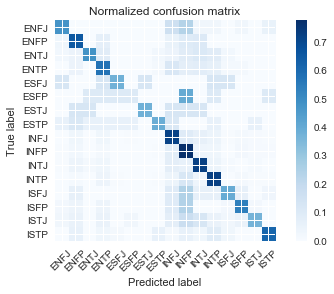

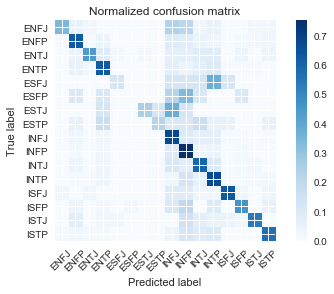

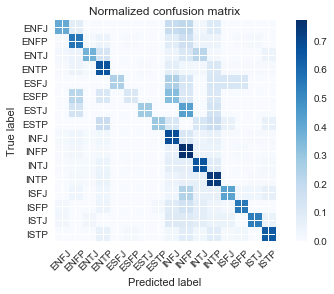

In [23]:
##### Extreme Gradient Boosting

import xgboost as xgb

# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.6
param['ntrees'] = 300
param['subsample'] = 0.93
param['max_depth'] = 2
param['silent'] = 1
param['nthread'] = 8
param['num_class'] = len(unique_type_list)

def train_stratified_xgb(X, y, nsplits):
    '''
    Stratified kfold validation for xgboost.
    '''
    for train, test in StratifiedKFold(subject_type, nsplits):
        train_X, train_Y, test_X, test_Y = X[train], y[train], X[test], y[test]
        xg_train = xgb.DMatrix(train_X, label=train_Y)
        xg_test = xgb.DMatrix(test_X, label=test_Y)
        watchlist = [(xg_train, 'train'), (xg_test, 'test')]
        num_round = 15
        bst = xgb.train(param, xg_train, num_round, watchlist)
        preds = bst.predict(xg_test)
        print(classification_report(y[test], preds))
        # get prediction
        error_rate = np.sum(preds != test_Y) / test_Y.shape[0]
        print('Test error using softmax = {}'.format(error_rate))
        
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(test_Y, preds)
        np.set_printoptions(precision=2)

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,
                              title='Normalized confusion matrix')

train_stratified_xgb(X_concat, subject_type, 5)

In [24]:
# Save model for later use
from sklearn.model_selection import train_test_split
import pickle

X, y, nsplits = X_concat, subject_type, 1
train_X, test_X, train_Y, test_Y = train_test_split(X_concat, y,
                                                    stratify=y, 
                                                    test_size=0.33)
xg_train = xgb.DMatrix(train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 15
bst = xgb.train(param, xg_train, num_round, watchlist)
preds = bst.predict(xg_test)
print(classification_report(test_Y, preds))
# get prediction
error_rate = np.sum(preds != test_Y) / test_Y.shape[0]
print('Test error using softmax = {}'.format(error_rate))
        
# save model to file
pickle.dump(bst, open("data/model.pickle.dat", "wb"))

[0]	train-merror:0.377667	test-merror:0.388054
[1]	train-merror:0.359085	test-merror:0.371987
[2]	train-merror:0.339986	test-merror:0.352777
[3]	train-merror:0.339642	test-merror:0.354523
[4]	train-merror:0.330695	test-merror:0.352428
[5]	train-merror:0.317791	test-merror:0.348585
[6]	train-merror:0.311597	test-merror:0.34649
[7]	train-merror:0.301273	test-merror:0.345791
[8]	train-merror:0.294907	test-merror:0.343695
[9]	train-merror:0.290606	test-merror:0.340552
[10]	train-merror:0.28011	test-merror:0.337408
[11]	train-merror:0.27254	test-merror:0.338456
[12]	train-merror:0.266346	test-merror:0.338456
[13]	train-merror:0.263421	test-merror:0.338805
[14]	train-merror:0.258431	test-merror:0.33636
             precision    recall  f1-score   support

          0       0.65      0.41      0.50        63
          1       0.68      0.62      0.65       223
          2       0.67      0.43      0.53        76
          3       0.64      0.62      0.63       226
          4       0.67      